<a href="https://colab.research.google.com/github/jung-han-lee/Projects/blob/master/Classification_of_new_cases_of_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download the data:
For this assignment, we will be using a gene expression dataset by Golub et al. (1999).

https://www.kaggle.com/crawford/gene-expression

>This dataset comes from a proof-of-concept study published in 1999 by Golub et al. It showed how new cases of cancer could be classified by gene expression monitoring (via DNA microarray) and thereby provided a general approach for identifying new cancer classes and assigning tumors to known classes. These data were used to classify patients with acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL).



# Part 0: Loading the Data



In [ ]:
import pandas as pd
import numpy as np
import sklearn.manifold as skm
import sklearn.decomposition as skd
import sklearn.cluster as skc
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as skp

%matplotlib inline

In [ ]:
df_train = pd.read_csv("gene-expression/data_set_ALL_AML_train.csv")
df_test = pd.read_csv("gene-expression/data_set_ALL_AML_independent.csv")

In [ ]:
df_train = df_train[[col for col in df_train.columns if "call" not in col]].T
df_test = df_test[[col for col in df_test.columns if "call" not in col]].T

In [ ]:
[df_train.shape, df_test.shape]

[(40, 7129), (36, 7129)]

In [ ]:
df_train.index

Index(['Gene Description', 'Gene Accession Number', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '34', '35',
       '36', '37', '38', '28', '29', '30', '31', '32', '33'],
      dtype='object')

In [ ]:
df_test.index

Index(['Gene Description', 'Gene Accession Number', '39', '40', '42', '47',
       '48', '49', '41', '43', '44', '45', '46', '70', '71', '72', '68', '69',
       '67', '55', '56', '59', '52', '53', '51', '50', '54', '57', '58', '60',
       '61', '65', '66', '63', '64', '62'],
      dtype='object')

In [ ]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [ ]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42


In [ ]:
df_test_clean = df_test.iloc[2:].copy()
df_train_clean = df_train.iloc[2:].copy()
df_test_clean.iloc[:] = skp.scale(df_test_clean.astype(np.float))
df_train_clean.iloc[:] = skp.scale(df_train_clean.astype(np.float))

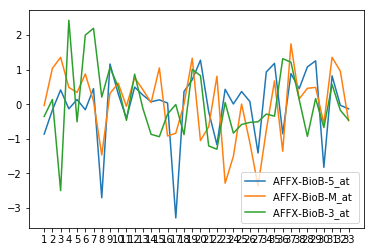

In [ ]:
plt.plot(df_train_clean.iloc[:,0])
plt.plot(df_train_clean.iloc[:,1])
plt.plot(df_train_clean.iloc[:,2])
plt.legend(['AFFX-BioB-5_at ','AFFX-BioB-M_at ','AFFX-BioB-3_at '])

The above graph shows how gene features are distributed. It is based on the training data. We can find that 'AFFX-BioB-5_at ' has larger variation compare to 'AFFX-BioB-M_at'. 

# Part 1: MDS

## 1.1. Visualize the gene expression data in 2D or 3D using Multidimensional Scaling

In [ ]:
df_train_clean.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
1,-0.861496,-0.033101,-0.351701,-0.805738,-0.168417,-0.888716,1.120068,0.280962,1.863470,0.449110,...,0.074511,-0.815620,-1.758717,-0.021865,-0.405584,-0.159782,-0.033046,0.546068,-0.435820,-0.255875
2,-0.167723,1.037400,0.139139,0.876572,0.114600,0.293351,-1.322502,0.370212,0.023726,-0.182439,...,-0.116640,0.292993,-0.589006,0.092516,0.073055,-0.182892,-0.197260,-0.267043,-0.595744,0.499648
3,0.415047,1.358550,-2.495899,1.100880,-0.907912,-1.577008,0.353591,-1.849884,1.303018,-1.565148,...,1.627617,1.524030,0.317849,-0.498816,1.724361,0.565043,2.130709,0.708690,-0.384366,-0.387270
4,-0.130721,0.488768,2.429729,-1.461407,-1.300484,-1.090715,0.930757,-0.578070,-0.609828,-0.388171,...,0.731595,0.286192,2.749271,-0.485868,-2.152617,-0.508538,-0.800986,-2.251033,-0.526212,-2.029712
5,0.137537,0.341574,-0.506703,-0.115559,0.425006,1.161198,0.219688,0.883400,-0.353970,0.669195,...,-0.271951,-0.346330,0.633277,0.226322,-0.142332,-1.300593,-0.105493,-0.169469,-0.623557,0.138311


In [ ]:
df_train_clean.describe()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
count,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,...,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01
mean,-4.966787e-17,-1.475428e-16,4.528541e-17,5.843279e-17,-2.512610e-16,5.551115e-17,4.382459e-18,-1.402387e-16,-4.090295e-17,-1.460820e-17,...,-8.034509e-17,-9.933574e-17,-2.045148e-17,-2.958160e-17,2.921640e-17,-3.505967e-17,-1.095615e-16,4.090295e-17,8.180591e-17,-2.045148e-17
std,1.013423e+00,1.013423e+00,1.013423e+00,1.013423e+00,1.013423e+00,1.013423e+00,1.013423e+00,1.013423e+00,1.013423e+00,1.013423e+00,...,1.013423e+00,1.013423e+00,1.013423e+00,1.013423e+00,1.013423e+00,1.013423e+00,1.013423e+00,1.013423e+00,1.013423e+00,1.013423e+00
min,-3.285076e+00,-2.361441e+00,-2.495899e+00,-1.875514e+00,-2.414292e+00,-2.624409e+00,-2.010484e+00,-2.920885e+00,-2.205897e+00,-1.565148e+00,...,-1.777269e+00,-1.791608e+00,-2.455287e+00,-7.836921e-01,-2.200481e+00,-1.416145e+00,-1.424031e+00,-2.251033e+00,-7.042144e-01,-2.128258e+00
25%,-1.654101e-01,-7.289267e-01,-5.691349e-01,-8.639716e-01,-8.919356e-01,-8.064200e-01,-5.791108e-01,-4.246719e-01,-7.682165e-01,-7.613588e-01,...,-7.020416e-01,-5.962778e-01,-6.777200e-01,-4.847885e-01,-6.688352e-01,-5.752431e-01,-4.979153e-01,-3.646159e-01,-5.123056e-01,-4.447558e-01
50%,1.329123e-01,1.207835e-01,-2.268381e-01,1.605119e-01,1.237298e-01,9.509299e-02,4.653786e-02,1.749771e-01,5.450618e-03,-1.991847e-01,...,-5.093181e-02,-1.728964e-01,2.213528e-02,-2.873178e-01,4.912349e-02,-2.616777e-01,-1.320572e-01,2.567718e-02,-3.628115e-01,1.054620e-01
75%,4.867365e-01,7.463576e-01,5.546317e-01,8.442198e-01,8.016008e-01,7.067004e-01,5.659879e-01,6.295948e-01,6.481426e-01,6.249387e-01,...,6.330321e-01,7.435798e-01,6.332765e-01,1.135584e-01,7.012693e-01,5.104181e-01,2.591574e-01,3.590525e-01,-2.384221e-02,5.817700e-01
max,1.275325e+00,1.746607e+00,2.429729e+00,1.816940e+00,2.059200e+00,2.126303e+00,2.135881e+00,1.976713e+00,2.241166e+00,2.147593e+00,...,2.117443e+00,3.067927e+00,2.749271e+00,4.592258e+00,1.724361e+00,3.037850e+00,3.734206e+00,3.115498e+00,3.738891e+00,2.142089e+00


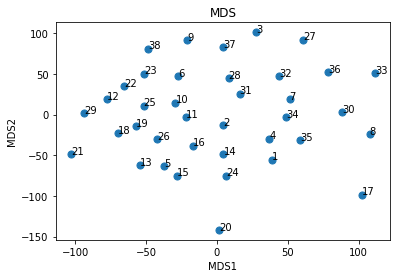

In [ ]:
X = skm.MDS(n_components=2).fit_transform(df_train_clean)
plt.scatter(X[:,0],X[:,1],s=50)

plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.title('MDS')

for i, s in enumerate(df_train_clean.index):
    plt.annotate(s, xy=X[i,:2]+0.05, fontsize=10)

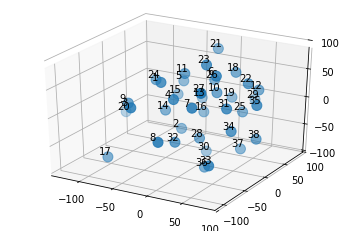

In [ ]:
X = skm.MDS(n_components=3).fit_transform(df_train_clean)

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], s=100)

ax.set_xticks([-100,-50,0,50,100])
ax.set_yticks([-100,-50,0,50,100])
ax.set_zticks([-100,-50,0,50,100])

for i, s in enumerate(df_train_clean.index):
    x, y, _ = proj3d.proj_transform(X[i,0],X[i,1],X[i,2],
                                    ax.get_proj())
    plt.annotate(s, xy=(x-0.005,y+0.002), fontsize=10)


Multidimensional scaling (MDS) is a means of visualizing the level of similarity of individual cases of a dataset. MDS is used to translate "information about the pairwise 'distances' among a set of n objects or individuals" into a configuration of n points mapped into an abstract Cartesian space.

The closer the distance in graph, the more possibility there is that they have same kind of leukemia.

From the first graph, we can find that distance between patient #21 and #8 is very far. So there is very low probobility that patient #21 and #8 have same leukemia. On the other hand, we can find that points of patient #5 and #15 are located very close to each other. So, it means that they should have same leukemia.

Additionally, let's see the second graph(3 dimensions graph). It is little bit harder to interpret compare to the previous one. But we can find that patient #21 and #8 are still far apart and #5 and #15 are close. We can check similarity between each patient's kind of leukemia.

# Part 2: PCA

## 2.1. Perform a Principal Component Analysis of the genes in the dataset 

In [ ]:
pca_model = skd.PCA().fit(df_train_clean) # matrix A in Z=XA' (X is our given data: df_train_clean)

In [ ]:
pca_model

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
Z = skd.PCA().fit_transform(df_train_clean) # matrix Z in Z=XA'

## 2.2. How much of the variance does each component explain? 

In [ ]:
pca_model.explained_variance_

array([1.09735759e+03, 8.76976485e+02, 4.83272186e+02, 3.57658145e+02,
       3.39170426e+02, 2.72510227e+02, 2.55597771e+02, 2.40859971e+02,
       2.18576598e+02, 1.93681882e+02, 1.83741623e+02, 1.72634428e+02,
       1.61466953e+02, 1.52866654e+02, 1.42171050e+02, 1.38629132e+02,
       1.35241393e+02, 1.25441555e+02, 1.24851480e+02, 1.20423734e+02,
       1.12430908e+02, 1.11931494e+02, 1.06610477e+02, 1.04779826e+02,
       1.03617441e+02, 1.00934278e+02, 9.86526997e+01, 9.56118071e+01,
       9.54129156e+01, 9.14541425e+01, 8.49250449e+01, 8.17690665e+01,
       7.56789591e+01, 7.30684864e+01, 6.76502725e+01, 6.28995436e+01,
       6.11190279e+01, 2.16415626e-28])



We can find that almost of all variances are bigger than 1 except tha last one. So, I can say that I should select 37 as the number of components.

## 2.3. What would be an appropriate number of components to keep? Why? 

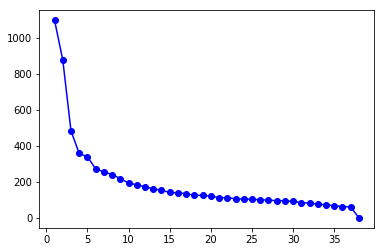

In [ ]:
#Scree plot
plt.plot(range(1,39),pca_model.explained_variance_,'b-o')





The improvements will decline, at some point rapidly, creating the elbow shape.

That point is the optimal value for K. In the image above, K=6. So, the appropriate number of components is 6. It is pretty different from the number that I get from above, calculating the Eigenvalues. However, I prefer 6 as the appropriate number rather than 37 because the purpose of PCA is reduction of the number factors minimizing the loss of information.

## 2.4 Visualize the data in the reduced component space.

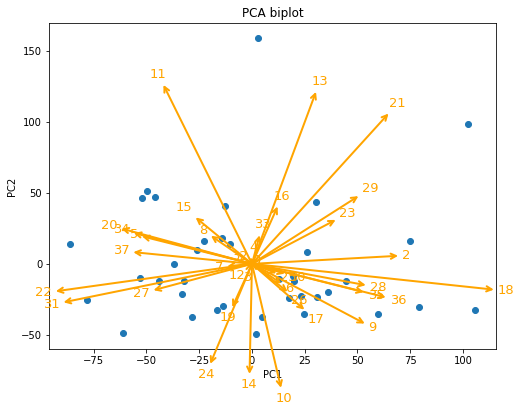

In [ ]:
#When I picked up 2 components
Z = skd.PCA().fit_transform(df_train_clean)   #Fit the model with 'df_train_clean' 
plt.figure(figsize=(8,6))                     #and apply the dimensionality reduction on 'df_train_clean'.
plt.scatter(Z[:,0], Z[:,1])                   #Z is the array of result of PCA.
plt.xlabel('PC1')                             
plt.ylabel('PC2')
plt.title('PCA biplot')


# Add variable unit vector projections
V = skd.PCA().fit_transform(np.identity(Z.shape[0]))
for i, v in enumerate(V):
    plt.annotate(df_train_clean.columns[i], 
                 xy=(0,0), xytext=v[:2]*300, 
                 fontsize=13, color='orange',
                 arrowprops=dict(
                    arrowstyle='<-', linewidth=2, color='orange'))

Let X is the data 'df_train_clean' and A is matrix for projection. Then we can find that Z=XA' where 'Z' is the array of the result of PCA. To find principal components, we should maximize variation of Z. So, we need to use Lagrangian Optimization, and we can get the matrix A. While solving the Lagrangian Optimization, we can get the matrix of EigenValues and also we can make scree plot based on the Eigenvalues. So we can pick up the number of components using the Eigenvalues.



From the  above biplot(I plotted it with two components: PC1, PC2), we can see the distribution of samples in 'df_train_clean' on the 2-dimensional graph. Also, we can find that the original variable 18, 2 strongly influence PC1 while 11, 14 have more say in PC2(Because they are almost parallel to PC1 or PC2). We can also find them using correlation between Principal Components and original variables.

# Part 3: Exploratory Factor Analysis

## 3.1. Create a preliminary factor model and compare it to your PCA results. 

In [ ]:
#df_clean = pd.concat([df_train_clean, df_test_clean], ignore_index=True)
fa_model = skd.FactorAnalysis(n_components=6).fit(df_test_clean)

# Show the loadings
df_fa=pd.DataFrame(fa_model.components_[:6,:].T, 
             index=df_test_clean.columns,
             columns=['Factor1', 'Factor2','Factors3','Factors4','Factors5','Factors6'])

In [ ]:
df_fa.head()

,Factor1,Factor2,Factors3,Factors4,Factors5,Factors6
0,-0.276548,0.018052,-0.301284,-0.037346,-0.186000,-0.140488
1,-0.750227,0.103321,0.053039,0.122090,0.077513,0.082169
2,-0.335206,0.025957,-0.231016,0.050679,-0.162919,0.366954
3,0.417815,0.003230,0.083670,-0.160436,-0.370681,-0.240230
4,-0.759801,0.100892,-0.157664,-0.147253,0.046734,0.246599


In [ ]:
# Add new factors
df_test_clean_fa=df_test_clean.copy()
df_test_clean_fa['Factor1']=skd.FactorAnalysis(6).fit_transform(df_test_clean)[:,0]
df_test_clean_fa['Factor2']=skd.FactorAnalysis(6).fit_transform(df_test_clean)[:,1]
df_test_clean_fa['Factor3']=skd.FactorAnalysis(6).fit_transform(df_test_clean)[:,2]
df_test_clean_fa['Factor4']=skd.FactorAnalysis(6).fit_transform(df_test_clean)[:,3]
df_test_clean_fa['Factor5']=skd.FactorAnalysis(6).fit_transform(df_test_clean)[:,4]
df_test_clean_fa['Factor6']=skd.FactorAnalysis(6).fit_transform(df_test_clean)[:,5]

df_test_clean_fa.head()

,0,1,2,3,4,5,6,7,8,9,...,7125,7126,7127,7128,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
39,-2.844380,-0.257223,0.306000,1.238686,0.025884,-0.523312,-1.667952,-1.049687,0.856798,-0.936277,...,1.050378,0.909252,-0.394315,-0.784861,0.440122,-0.843354,1.392694,-0.898228,-0.704558,-0.337253
40,0.249432,-0.680824,2.043929,0.923680,0.010308,-0.960346,1.338615,-2.535584,1.481976,0.327970,...,-0.026902,-0.587509,-0.819890,0.229552,0.621246,-0.556869,-1.224288,-1.262646,-0.382880,1.311194
41,0.552747,1.304804,-0.071469,-0.536801,-0.044209,0.423596,-0.230796,0.761249,-0.777441,-0.630544,...,-0.529972,1.574480,-0.538290,0.291659,-1.005093,0.606122,-0.441995,-0.594864,0.164368,-0.146443
42,1.571885,0.157552,0.117265,0.742313,0.127130,0.648735,0.421656,0.352627,-0.645824,1.724427,...,0.145869,0.133154,3.423164,-0.205196,-0.229670,0.446905,0.852976,-0.113208,-0.922213,0.046935
43,2.348371,1.190079,-1.125237,0.513218,0.205011,-0.238577,-0.974355,-0.167436,-1.303907,-2.274892,...,-1.317606,0.151633,2.521197,-1.012586,-0.750540,-0.158382,-0.061330,-0.780987,-0.526076,-0.353418


In [ ]:
fa_cor = df_test_clean_fa.corr()[['Factor1','Factor2','Factor3','Factor4','Factor5','Factor6']]

In [ ]:
#Extract the original variables which have the value of correlation higher than 0.85 with each factor(In factor analysis model)
for c in fa_cor.columns:
    a=[]
    for i in fa_cor.index:
        if abs(fa_cor.loc[i,c])>0.85:
            a.append(i)
    print(c,a)

Factor1 [5, 93, 190, 267, 278, 346, 377, 387, 525, 575, 585, 647, 782, 798, 801, 807, 834, 861, 869, 918, 935, 980, 990, 997, 999, 1033, 1083, 1295, 1354, 1358, 1658, 1672, 1809, 1870, 1971, 1978, 2007, 2248, 2329, 2419, 2505, 2548, 2552, 2572, 2742, 2807, 2844, 2897, 2977, 3038, 3071, 3141, 3186, 3225, 3364, 3439, 3565, 3586, 3657, 3666, 3881, 3909, 4120, 4487, 4636, 4691, 4720, 4833, 4866, 4869, 4876, 4991, 5026, 5200, 5336, 5353, 5856, 5871, 5920, 5995, 6056, 6136, 6297, 6381, 6408, 6528, 6635, 6688, 6834, 6836, 6853, 6965, 7012, 7047, 7062, 'Factor1']
Factor2 [169, 1648, 1933, 1997, 3354, 3706, 3711, 3974, 4242, 4802, 4974, 5331, 'Factor2']
Factor3 ['Factor3']
Factor4 ['Factor4']
Factor5 ['Factor5']
Factor6 ['Factor6']


From the above result, we can find that 'Factor 1' is highly related with orginal variable 5, 93, 190, 267, 278, ect. while 'Factor 2' just highly related with 12 original variables 169, 1648, 1933, 1997,, etc. and the other factors don't have highly related variables.

In [ ]:
# build a PCA model to compare with the factor model above
pca_model = skd.PCA(n_components=2).fit(df_test_clean)

# Show the principcal components
df_pca=pd.DataFrame(pca_model.components_[:2,:].T, 
             index=df_test_clean.columns,
             columns=['Component1', 'Component2'])

In [ ]:
df_pca.head()

,Component1,Component2
0,-0.007861,0.000606
1,-0.021144,0.004103
2,-0.009524,-0.000221
3,0.011807,0.000371
4,-0.021719,0.002590


In [ ]:
df_test_clean_pc=df_test_clean.copy()
df_test_clean_pc['Component1']=skd.PCA(2).fit_transform(df_test_clean)[:,0]
df_test_clean_pc['Component2']=skd.PCA(2).fit_transform(df_test_clean)[:,1]

In [ ]:
pca_cor = df_test_clean_pc.corr()[['Component1','Component2']]

In [ ]:
#Extract the original variables which have the value of correlation higher than 0.85 with each factor(In PCA model)
for c in pca_cor.columns:
    a=[]
    for i in pca_cor.index:
        if abs(pca_cor.loc[i,c])>0.85:
            a.append(i)
    print(c,a)

Component1 [5, 93, 190, 267, 278, 346, 377, 387, 525, 575, 585, 647, 782, 798, 801, 807, 834, 861, 869, 892, 918, 935, 980, 990, 997, 999, 1007, 1062, 1083, 1295, 1354, 1358, 1658, 1672, 1809, 1870, 1971, 1978, 2007, 2248, 2329, 2419, 2505, 2552, 2572, 2742, 2807, 2844, 2897, 2977, 3038, 3071, 3141, 3186, 3225, 3364, 3439, 3565, 3586, 3657, 3666, 3840, 3881, 3909, 4120, 4487, 4636, 4691, 4720, 4833, 4866, 4869, 4876, 4991, 5026, 5200, 5336, 5353, 5706, 5856, 5871, 5920, 5995, 6056, 6136, 6150, 6297, 6381, 6408, 6528, 6635, 6688, 6834, 6836, 6853, 6965, 7005, 7012, 7047, 7062, 'Component1']
Component2 [169, 1648, 1997, 2255, 3706, 3711, 4242, 4290, 5331, 'Component2']


'Component1' is highly related with lots of original variable. It has much more related variables compare to 'Component 2', which means that 'Component 1' is the PC1 and 'Component 2' is the PC2. So PC1 is more important than PC2 .


Similarities : 
1) Both of them reduce the dimension.
2) New variables(components) are created by the both models to explain the data.

Differences :
1)In PCA, the components are actual orthogonal linear combinations that maximize the total variance. In FA, the factors are linear combinations that maximize the shared portion of the variance. They look like similar, but the purposes are different.
2)The number of new variables in the Factor Analysis is determined by Eigens values or Scree plot. However, in PCA, we can pick up the number of new components by ourselves and normally 2 principal components are preferred.
3) In PCA, there are relative importance between new variables(components). PC1 > PC2 > PC3 ,,,. However, in FA, every new variables are equal in their relationship.


## 3.2. Create another factor model and compare it to the first. 

In [ ]:
fa_model2 = skd.FactorAnalysis(n_components=5).fit(df_test_clean)

# Show the loadings
df_fa2=pd.DataFrame(fa_model2.components_[:5,:].T, 
             index=df_test_clean.columns,
             columns=['Factor1', 'Factor2','Factor3','Factor4','Factor5'])

In [ ]:
df_fa2.head(), df_fa.head()

(    Factor1   Factor2   Factor3   Factor4   Factor5
 0 -0.276890  0.018503 -0.290455  0.080383 -0.193202
 1 -0.750090  0.105998  0.046696 -0.114814  0.081712
 2 -0.332130  0.026703 -0.223439 -0.044783 -0.158889
 3  0.416950  0.001675  0.103178  0.175800 -0.342107
 4 -0.756524  0.105090 -0.158521  0.135669  0.049405,
     Factor1   Factor2  Factors3  Factors4  Factors5  Factors6
 0 -0.276548  0.018052 -0.301284 -0.037346 -0.186000 -0.140488
 1 -0.750227  0.103321  0.053039  0.122090  0.077513  0.082169
 2 -0.335206  0.025957 -0.231016  0.050679 -0.162919  0.366954
 3  0.417815  0.003230  0.083670 -0.160436 -0.370681 -0.240230
 4 -0.759801  0.100892 -0.157664 -0.147253  0.046734  0.246599)

Let's say df_fa2 as A5, df_fa as A6. We multiply A5 and A6 to original variables in the given matrix 'df_test_clean'(cause it is linear combination of original variables. A5, A6 is made up by coefficients of linear combination). As we can see from the above results, values of Factor1 ~ Factor5 in both charts are almost same. Absolute value in A5 is little bit bigger because they should explain given 7129 original variables using 5 new factors not 6 factors. Therefore, each factor is latent variable of original variables.

In [ ]:
df_test_clean_fa=df_test_clean.copy()
df_test_clean_fa['Factor1']=skd.FactorAnalysis(6).fit_transform(df_test_clean)[:,0]
df_test_clean_fa['Factor2']=skd.FactorAnalysis(6).fit_transform(df_test_clean)[:,1]
df_test_clean_fa['Factor3']=skd.FactorAnalysis(6).fit_transform(df_test_clean)[:,2]
df_test_clean_fa['Factor4']=skd.FactorAnalysis(6).fit_transform(df_test_clean)[:,3]
df_test_clean_fa['Factor5']=skd.FactorAnalysis(6).fit_transform(df_test_clean)[:,4]

df_test_clean_fa.head()

,0,1,2,3,4,5,6,7,8,9,...,7124,7125,7126,7127,7128,Factor1,Factor2,Factor3,Factor4,Factor5
39,-2.844380,-0.257223,0.306000,1.238686,0.025884,-0.523312,-1.667952,-1.049687,0.856798,-0.936277,...,1.001512,1.050378,0.909252,-0.394315,-0.784861,0.440122,-0.843354,1.392694,-0.898228,-0.704558
40,0.249432,-0.680824,2.043929,0.923680,0.010308,-0.960346,1.338615,-2.535584,1.481976,0.327970,...,-1.568936,-0.026902,-0.587509,-0.819890,0.229552,0.621246,-0.556869,-1.224288,-1.262646,-0.382880
41,0.552747,1.304804,-0.071469,-0.536801,-0.044209,0.423596,-0.230796,0.761249,-0.777441,-0.630544,...,-1.114577,-0.529972,1.574480,-0.538290,0.291659,-1.005093,0.606122,-0.441995,-0.594864,0.164368
42,1.571885,0.157552,0.117265,0.742313,0.127130,0.648735,0.421656,0.352627,-0.645824,1.724427,...,0.539495,0.145869,0.133154,3.423164,-0.205196,-0.229670,0.446905,0.852976,-0.113208,-0.922213
43,2.348371,1.190079,-1.125237,0.513218,0.205011,-0.238577,-0.974355,-0.167436,-1.303907,-2.274892,...,1.412478,-1.317606,0.151633,2.521197,-1.012586,-0.750540,-0.158382,-0.061330,-0.780987,-0.526076


In [ ]:
fa_cor = df_test_clean_fa.corr()[['Factor1','Factor2','Factor3','Factor4','Factor5']]

In [ ]:
for c in fa_cor.columns:
    a=[]
    for i in fa_cor.index:
        if abs(fa_cor.loc[i,c])>0.85:
            a.append(i)
    print(c,a)

Factor1 [5, 93, 190, 267, 278, 346, 377, 387, 525, 575, 585, 647, 782, 798, 801, 807, 834, 861, 869, 918, 935, 980, 990, 997, 999, 1033, 1083, 1295, 1354, 1358, 1658, 1672, 1809, 1870, 1971, 1978, 2007, 2248, 2329, 2419, 2505, 2548, 2552, 2572, 2742, 2807, 2844, 2897, 2977, 3038, 3071, 3141, 3186, 3225, 3364, 3439, 3565, 3586, 3657, 3666, 3881, 3909, 4120, 4487, 4636, 4691, 4720, 4833, 4866, 4869, 4876, 4991, 5026, 5200, 5336, 5353, 5856, 5871, 5920, 5995, 6056, 6136, 6297, 6381, 6408, 6528, 6635, 6688, 6834, 6836, 6853, 6965, 7012, 7047, 7062, 'Factor1']
Factor2 [169, 1648, 1933, 1997, 3354, 3706, 3711, 3974, 4242, 4802, 4974, 5331, 'Factor2']
Factor3 ['Factor3']
Factor4 ['Factor4']
Factor5 ['Factor5']





Still only 'Factor 1' and 'Factor 2' has strong relationships with some original variables.

# Part 4: Clustering

## 4.1. Perform a cluster analysis on the data. Visualize the results in 2D or 3D using PCA.

In [ ]:
#Getting matrix A, Z and dataframe of Z
pca_model = skd.PCA(n_components=2).fit_transform(df_test_clean)
df_pca_model=pd.DataFrame(pca_model)
df_pca_model=df_pca_model.rename(columns={0:'PC1',1:'PC2'})  #Dataframe of Z
df_pca_model.head()

,PC1,PC2
0,15.954476,-19.998095
1,22.690965,-17.487530
2,-8.391154,15.127873
3,-22.755723,6.735899
4,8.936895,70.863460


In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd
import seaborn as sns
import numpy as np

def plot_dendrogram(model, **kwargs):          # **kwargs : allow us to use keyworded variables(label = music) ////  *args : is used to send non-keyworded variables (a,b,c)

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


In [ ]:
model = AgglomerativeClustering(n_clusters=2)
model = model.fit(pca_model)
df_hierarch_model = df_pca_model.copy()
df_hierarch_model['cluster'] = model.labels_

In [ ]:
df_hierarch_model.head()

,PC1,PC2,cluster
0,15.959349,-19.992770,1
1,22.695480,-17.483030,1
2,-36.254809,13.987043,0
3,-8.398533,15.132993,0
4,-26.523397,-4.334377,0


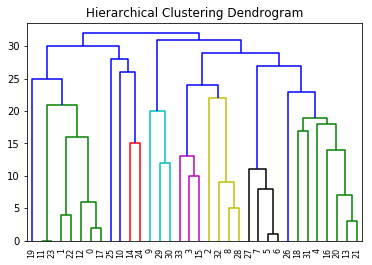

In [ ]:
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model,labels=df_pca_model.index.values)
plt.xticks(rotation=90)
plt.show()

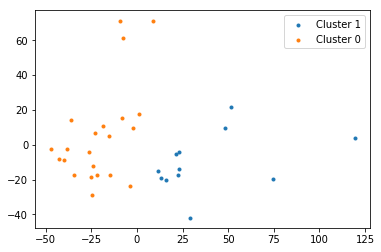

In [ ]:
df_hierarch_model_1 = df_hierarch_model[df_hierarch_model.cluster == 1]
df_hierarch_model_0 = df_hierarch_model[df_hierarch_model.cluster == 0]

plt.scatter(df_hierarch_model_1.iloc[:, 0], df_hierarch_model_1.iloc[:, 1],marker = '.')
plt.scatter(df_hierarch_model_0.iloc[:, 0], df_hierarch_model_0.iloc[:, 1],marker = '.')
plt.legend(['Cluster 1', 'Cluster 0'])

34 samples in df_test_clean are divided by 2 clusters by hierarchical clustering method.

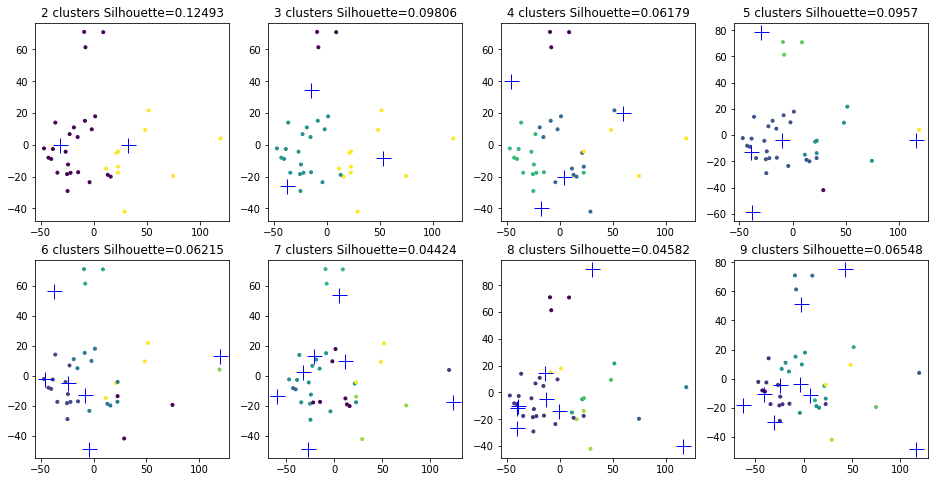

In [ ]:
#Silhouette method
plt.figure(figsize=(16, 8))
scores, n_clusters, preds = [], [], []
for i in range(2, 10):
    kmean = KMeans(n_clusters = i).fit(df_test_clean)
    scores.append(kmean.score(df_test_clean))
    n_clusters.append(i)
    pred = kmean.predict(df_test_clean)
    preds.append(pred)
    plt.subplot(2, 4, i - 1)
    plt.title(f"{i} clusters Silhouette={np.round(silhouette_score(df_test_clean, pred), decimals=5)}")
    plt.scatter(pca_model[:, 0], pca_model[:, 1], c=pred, marker = '.')
    
    centroids = kmean.cluster_centers_
    centroids2d = skd.PCA(n_components=2).fit_transform(centroids)
    plt.plot(centroids2d[:, 0], centroids2d[:, 1], 'b+', markersize=15)

Using Silhouette method, I chose 2 as the optimal number of clusters.

(1, 15.65)

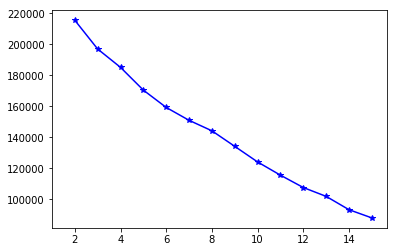

In [ ]:
#Elbow method
cost = []
for k in range(2,16):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10)
    k_means.fit(df_test_clean)
    cost.append(k_means.inertia_)

fig, ax = plt.subplots()
plt.plot(range(2,16), cost, 'b*-')
plt.xlim(1, plt.xlim()[1])


Cannot pick up the optimal number of clusters because I cannot find big difference in slope.

In [ ]:
#rule of thumb
np.sqrt(len(df_test_clean)/2)

4.123105625617661

Using the rule of Thumb, the optimal number of clusters is 4. But I'll select 2 as the number of cluster.

In [ ]:
kmeans = KMeans(n_clusters=2) 
kmeans.fit(df_test_clean)
df_kmeans_model = df_pca_model.copy()
df_kmeans_model['Pred'] = kmeans.labels_

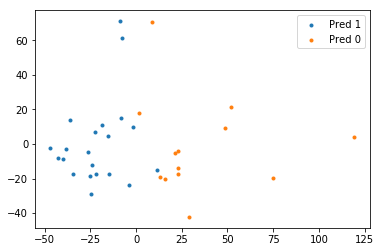

In [ ]:
df_kmeans_model_1 = df_kmeans_model[df_kmeans_model.Pred == 1]
df_kmeans_model_0 = df_kmeans_model[df_kmeans_model.Pred == 0]

plt.scatter(df_kmeans_model_1.iloc[:, 0], df_kmeans_model_1.iloc[:, 1],marker = '.')
plt.scatter(df_kmeans_model_0.iloc[:, 0], df_kmeans_model_0.iloc[:, 1],marker = '.')
plt.legend(['Pred 1', 'Pred 0'])


I made 2 clusters using K-means clustering method.

## 4.2. Which clusters can we identify? 

In [ ]:
df_test_clean.index = pd.to_numeric(df_test_clean.index)
df_test_clean.sort_index(inplace=True)

In [ ]:
kmeans = KMeans(n_clusters=2) 
kmeans.fit(df_test_clean)

df_pca_model['Pred']=kmeans.labels_

In [ ]:
#Pred : prediction of K-means, cat : actual data 'cancer'
df_pca_model['cat'] = list(pd.read_csv('gene-expression/actual.csv')[38:]['cancer'])
dic = {'ALL':0,'AML':1}
df_pca_model.replace(dic,inplace=True)
df_pca_model[['Pred','cat']]

,Pred,cat
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


Cluster 0 means 'ALL' and cluster 1 means 'AML'.

In [ ]:
#accuracy of clustering method
p=0
for i in range(len(df_test_clean)):
    if df_pca_model.iloc[i]['Pred'] == df_pca_model.iloc[i]['cat']:
        p=p+1
print(p/len(df_test_clean))

0.7647058823529411


I used K-means clustering method, and it's accuracy is 0.7647058823529411.

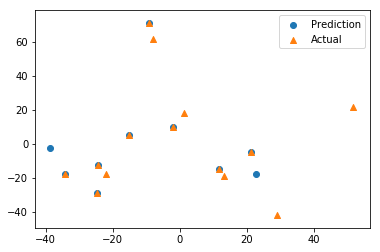

In [ ]:
df_pred_1 = df_pca_model[df_pca_model.Pred == 1]
df_cat_1 = df_pca_model[df_pca_model.cat == 1]

plt.scatter(df_pred_1.iloc[:, 0], df_pred_1.iloc[:, 1],marker = 'o')
plt.scatter(df_cat_1.iloc[:, 0], df_cat_1.iloc[:, 1],marker = '^')
plt.legend(['Prediction', 'Actual'])


We can check how accurate the clustering method is from the above graph.